In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [37]:
data=pd.read_excel('churn.xlsx')

data.head()

,Cliente_ID,Idade,Tempo_de_Contrato (meses),Região,Profissão,Histórico_de_Pagamento,Frequência_de_Manutenção,NPS (Satisfação do Cliente),Tempo_de_Resposta_Atendimento (min),Motivo_do_Churn,Mês_do_Churn
0,1,46,16,Norte,Entregador de App,Pontual,Bimestral,9,25,Problemas financeiros,Ago
1,2,32,13,Nordeste,CLT,Inadimplente Frequente,Bimestral,8,52,Custo do plano,Jan
2,3,25,1,Nordeste,Entregador de App,Pontual,Trimestral,4,33,Problemas financeiros,Jan
3,4,38,22,Sudeste,Mototaxista,Pontual,Bimestral,8,9,Problemas financeiros,Jul
4,5,36,20,Centro-Oeste,Autônomo,Pontual,Nenhuma,1,53,Qualidade da moto,Ago


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Cliente_ID                           500 non-null    int64 
 1   Idade                                500 non-null    int64 
 2   Tempo_de_Contrato (meses)            500 non-null    int64 
 3   Região                               500 non-null    object
 4   Profissão                            500 non-null    object
 5   Histórico_de_Pagamento               500 non-null    object
 6   Frequência_de_Manutenção             500 non-null    object
 7   NPS (Satisfação do Cliente)          500 non-null    int64 
 8   Tempo_de_Resposta_Atendimento (min)  500 non-null    int64 
 9   Motivo_do_Churn                      500 non-null    object
 10  Mês_do_Churn                         500 non-null    object
dtypes: int64(5), object(6)
memory usage: 43.1+ KB

In [ ]:
categorical_cols = ['região', 'profissão', 'histórico_de_pagamento', 'frequência_de_manutenção', 'mês_do_churn', 'motivo_do_churn']
data[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
#map month names to numbers
month_mapping = {
    'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6,
    'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12
}

data['Mês_do_Churn_Num'] = data['Mês_do_Churn'].str.lower().map(month_mapping)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Cliente_ID                           500 non-null    int64 
 1   Idade                                500 non-null    int64 
 2   Tempo_de_Contrato (meses)            500 non-null    int64 
 3   Região                               500 non-null    object
 4   Profissão                            500 non-null    object
 5   Histórico_de_Pagamento               500 non-null    object
 6   Frequência_de_Manutenção             500 non-null    object
 7   NPS (Satisfação do Cliente)          500 non-null    int64 
 8   Tempo_de_Resposta_Atendimento (min)  500 non-null    int64 
 9   Motivo_do_Churn                      500 non-null    object
 10  Mês_do_Churn                         500 non-null    object
 11  Mês_do_Churn_Num                     500 non-

In [ ]:
data['Motivo_do_Churn'].unique()

7

In [41]:
data = data.drop('Cliente_ID',axis=1)

In [42]:
data.drop_duplicates()

,Idade,Tempo_de_Contrato (meses),Região,Profissão,Histórico_de_Pagamento,Frequência_de_Manutenção,NPS (Satisfação do Cliente),Tempo_de_Resposta_Atendimento (min),Motivo_do_Churn,Mês_do_Churn,Mês_do_Churn_Num
0,46,16,Norte,Entregador de App,Pontual,Bimestral,9,25,Problemas financeiros,Ago,8
1,32,13,Nordeste,CLT,Inadimplente Frequente,Bimestral,8,52,Custo do plano,Jan,1
2,25,1,Nordeste,Entregador de App,Pontual,Trimestral,4,33,Problemas financeiros,Jan,1
3,38,22,Sudeste,Mototaxista,Pontual,Bimestral,8,9,Problemas financeiros,Jul,7
4,36,20,Centro-Oeste,Autônomo,Pontual,Nenhuma,1,53,Qualidade da moto,Ago,8
...,...,...,...,...,...,...,...,...,...,...,...
495,22,23,Sudeste,Entregador de App,Pontual,Trimestral,1,51,Falta de manutenção preventiva,Out,10
496,46,15,Norte,Entregador de App,Pontual,Mensal,8,21,Problemas financeiros,Dez,12
497,54,14,Nordeste,Autônomo,Pontual,Trimestral,0,33,Problemas financeiros,Jan,1
498,36,11,Centro-Oeste,Entregador de App,Atrasos Ocasional,Bimestral,5,50,Custo do plano,Out,10


<Axes: >

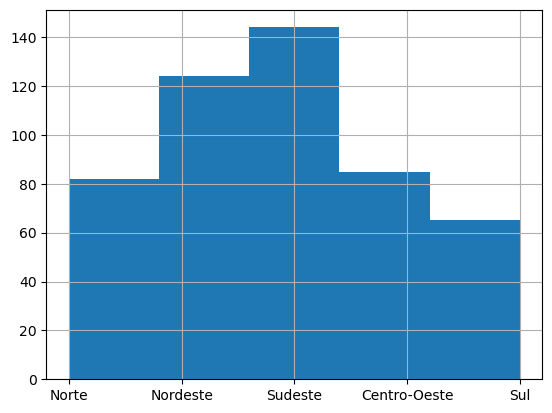

In [43]:
data['Região'].hist(bins=5)

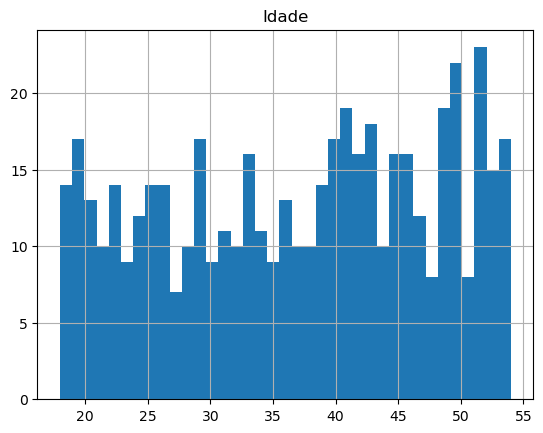

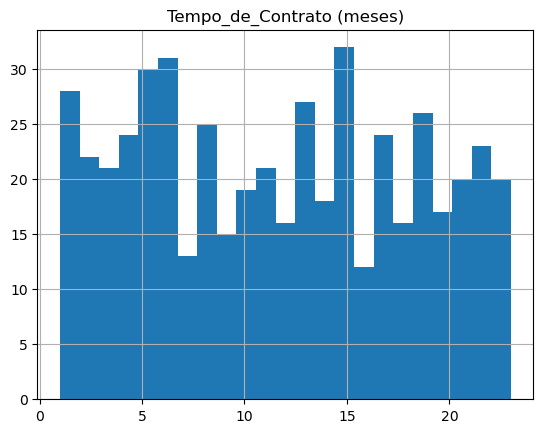

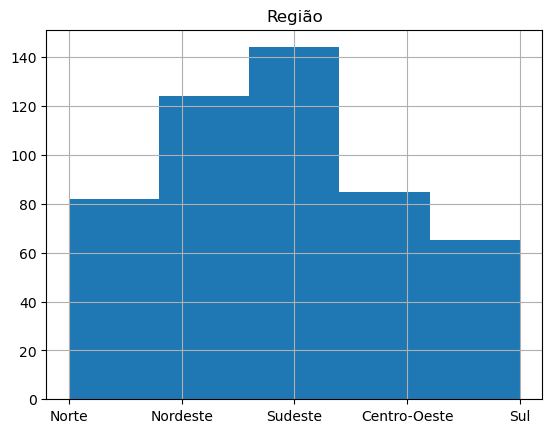

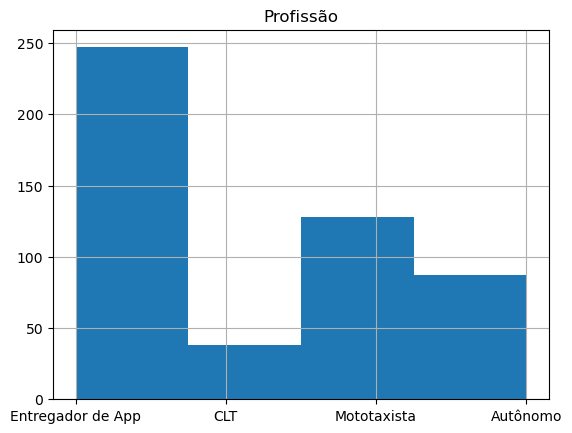

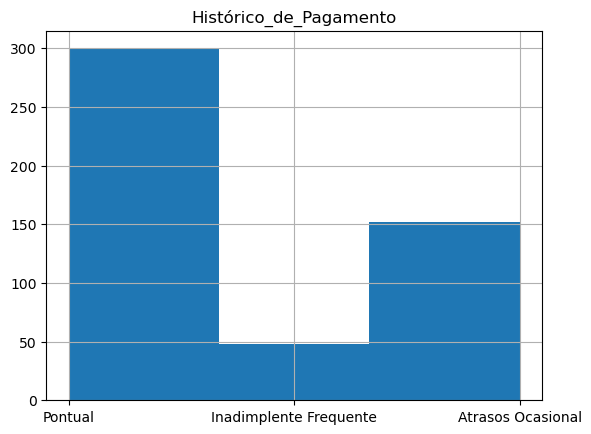

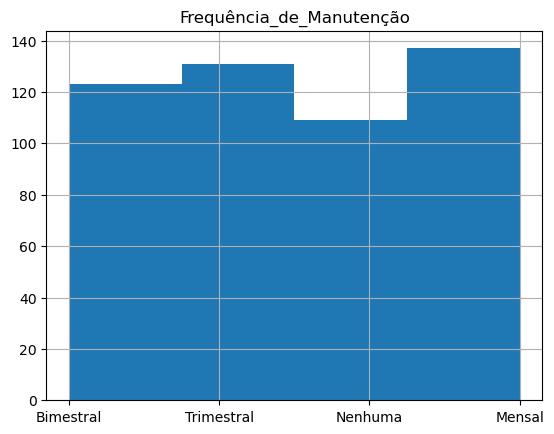

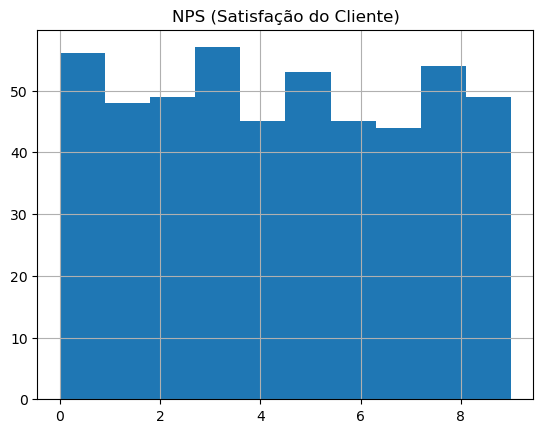

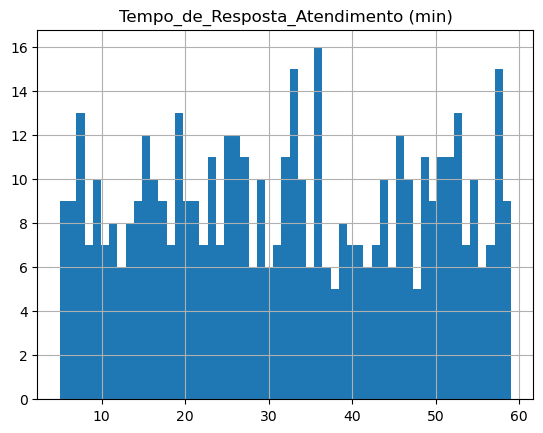

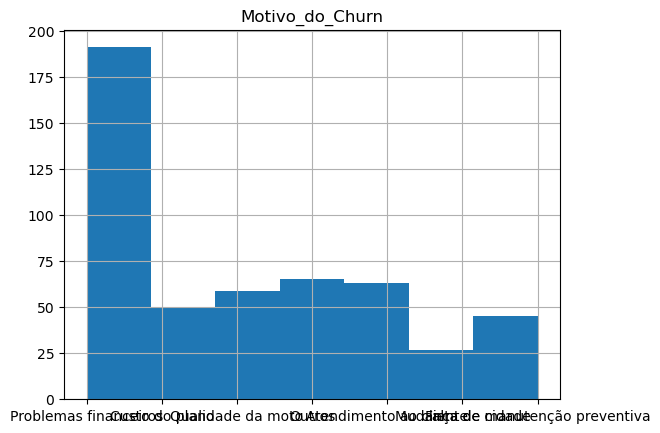

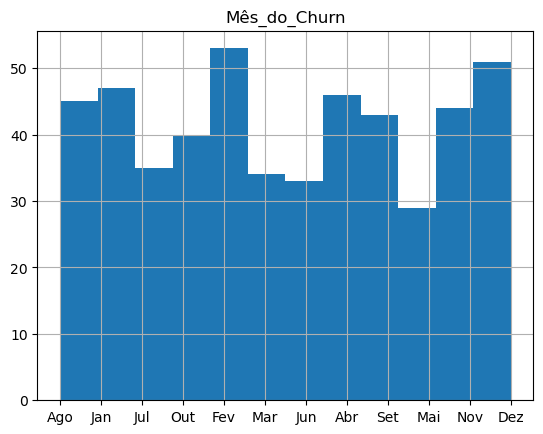

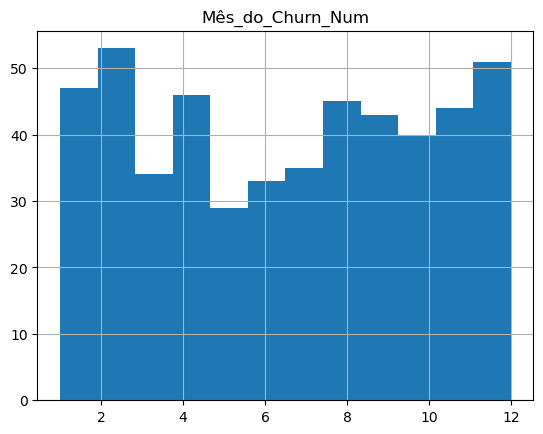

In [58]:
for column in data.columns:
    # if data[column].dtype in ['int64', 'float64']:  # Plot only numerical columns
        data[column].hist(bins=len(data[column].unique()))
        plt.title(column)
        plt.show()

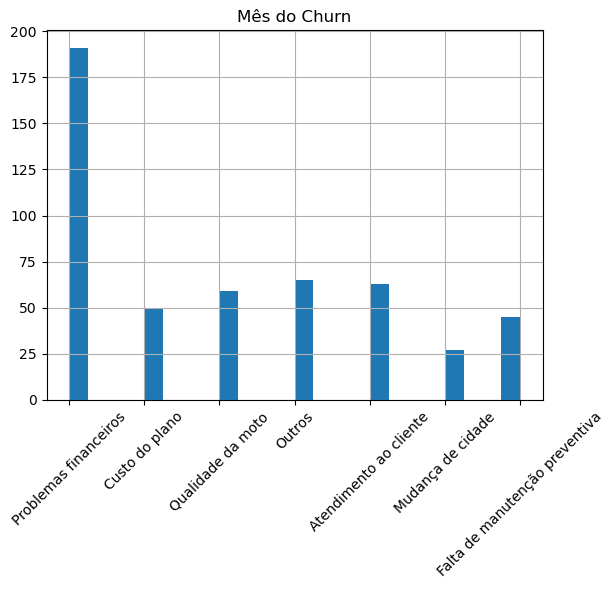

In [62]:
data["Motivo_do_Churn"].hist(bins=24)
plt.xticks(rotation=45)
plt.title("Mês do Churn")
plt.show()

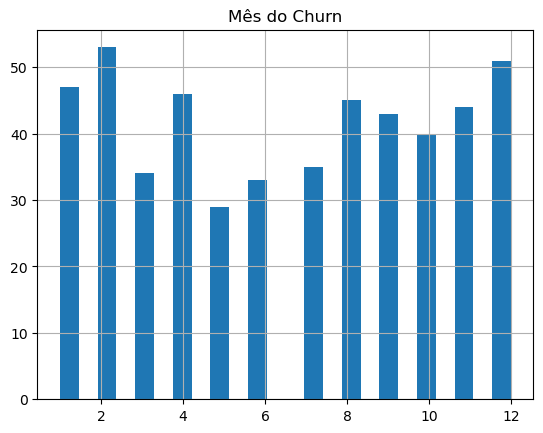

In [48]:
data["Mês_do_Churn_Num"].hist(bins=24)
plt.title("Mês do Churn")
plt.show()

In [63]:
values_to_drop = ["Problemas financeiros", "mudança de cidade", "Outros"]


data = data[~data['Motivo_do_Churn'].isin(values_to_drop)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 499
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Idade                                244 non-null    int64 
 1   Tempo_de_Contrato (meses)            244 non-null    int64 
 2   Região                               244 non-null    object
 3   Profissão                            244 non-null    object
 4   Histórico_de_Pagamento               244 non-null    object
 5   Frequência_de_Manutenção             244 non-null    object
 6   NPS (Satisfação do Cliente)          244 non-null    int64 
 7   Tempo_de_Resposta_Atendimento (min)  244 non-null    int64 
 8   Motivo_do_Churn                      244 non-null    object
 9   Mês_do_Churn                         244 non-null    object
 10  Mês_do_Churn_Num                     244 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 22.9+ KB


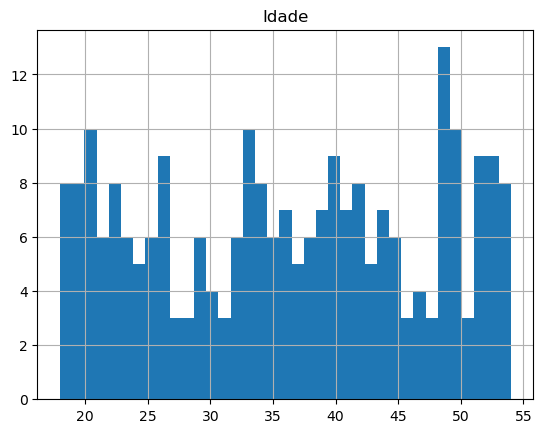

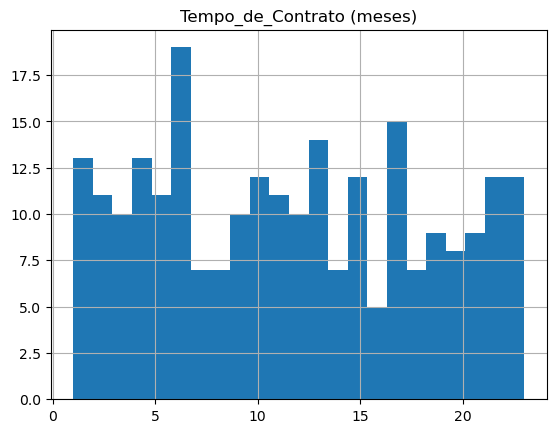

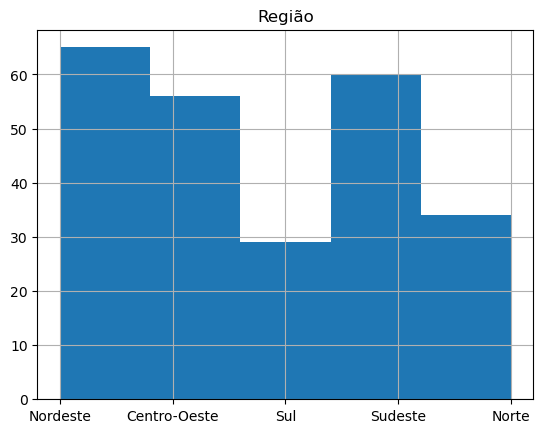

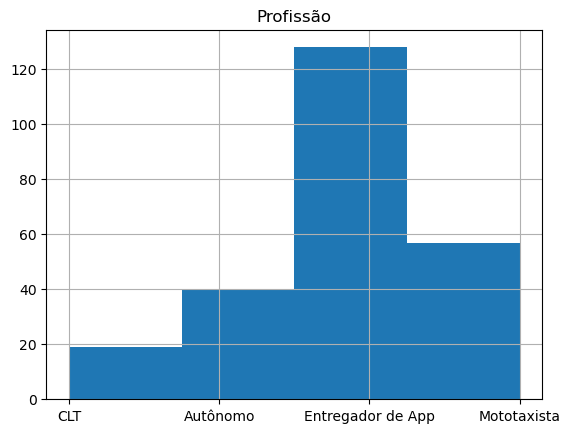

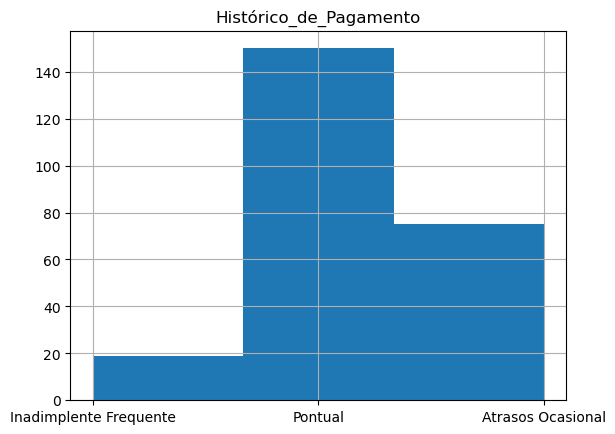

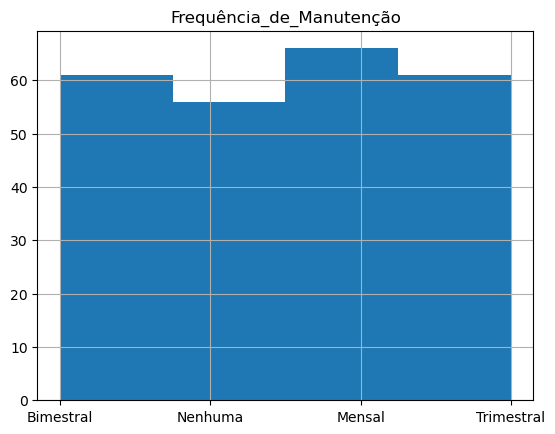

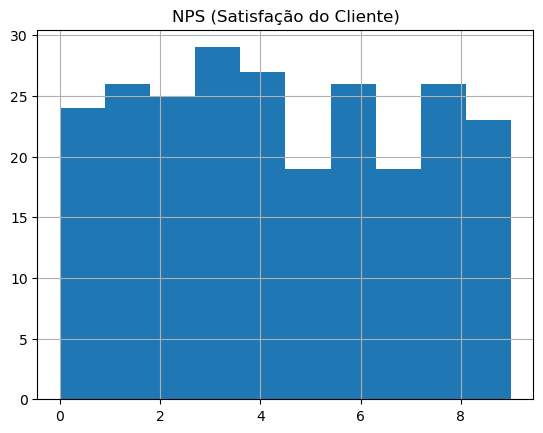

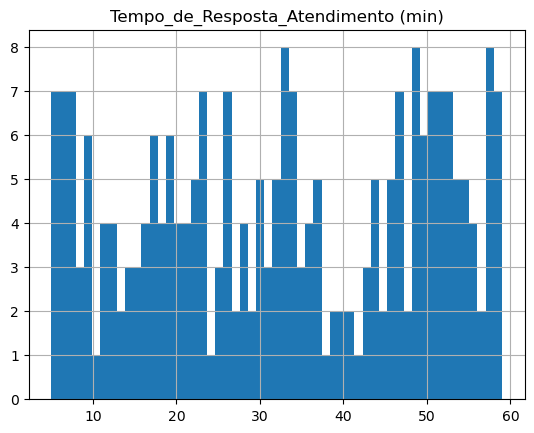

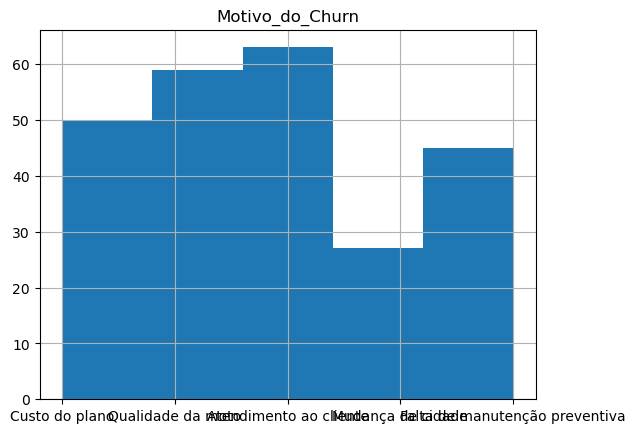

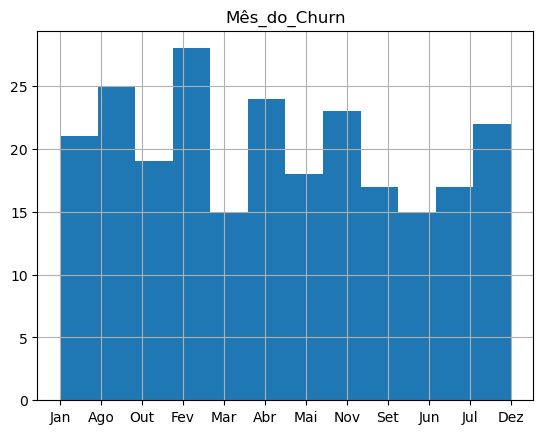

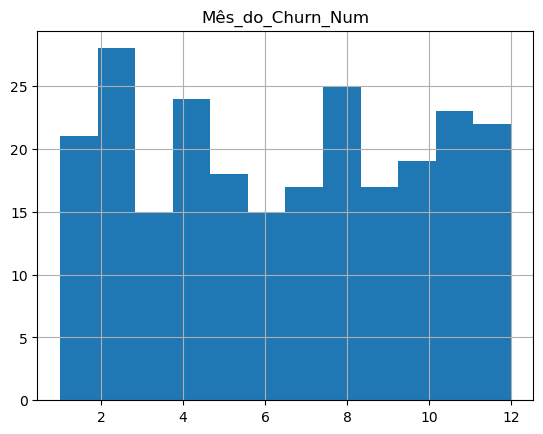

In [64]:
for column in data.columns:
    # if data[column].dtype in ['int64', 'float64']:  # Plot only numerical columns
        data[column].hist(bins=len(data[column].unique()))
        plt.title(column)
        plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26028\1508807501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Motivo_do_Churn', order=data['Motivo_do_Churn'].value_counts().index, palette='Reds_r')


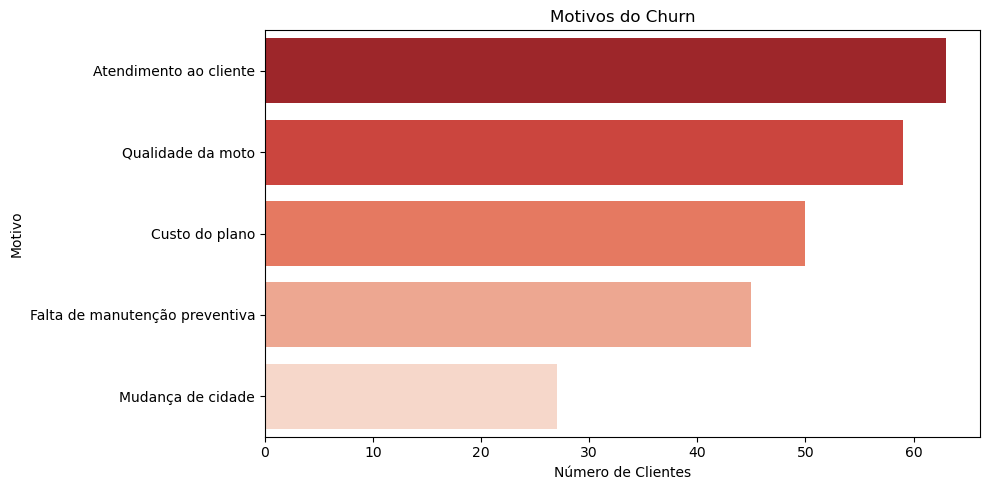

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exibe principais motivos de churn
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='Motivo_do_Churn', order=data['Motivo_do_Churn'].value_counts().index, palette='Reds_r')
plt.title("Motivos do Churn")
plt.xlabel("Número de Clientes")
plt.ylabel("Motivo")
plt.tight_layout()
plt.show()


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 499
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Idade                                244 non-null    int64 
 1   Tempo_de_Contrato (meses)            244 non-null    int64 
 2   Região                               244 non-null    object
 3   Profissão                            244 non-null    object
 4   Histórico_de_Pagamento               244 non-null    object
 5   Frequência_de_Manutenção             244 non-null    object
 6   NPS (Satisfação do Cliente)          244 non-null    int64 
 7   Tempo_de_Resposta_Atendimento (min)  244 non-null    int64 
 8   Motivo_do_Churn                      244 non-null    object
 9   Mês_do_Churn                         244 non-null    object
 10  Mês_do_Churn_Num                     244 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 22.9+ KB


In [72]:
# Média de NPS, tempo de atendimento e distribuição de manutenção por motivo de churn
data.groupby('Motivo_do_Churn')[['NPS (Satisfação do Cliente)', 'Tempo_de_Resposta_Atendimento (min)']].mean()

# Tabela cruzada de manutenção vs motivo de churn
pd.crosstab(data['Frequência_de_Manutenção'], data['Motivo_do_Churn'], normalize='index')


Motivo_do_Churn,Atendimento ao cliente,Custo do plano,Falta de manutenção preventiva,Mudança de cidade,Qualidade da moto
Frequência_de_Manutenção,,,,,
Bimestral,0.245902,0.180328,0.213115,0.081967,0.278689
Mensal,0.242424,0.212121,0.151515,0.166667,0.227273
Nenhuma,0.267857,0.232143,0.142857,0.125000,0.232143
Trimestral,0.278689,0.196721,0.229508,0.065574,0.229508


In [73]:
# Segmentos com mais churn
segmentos = data.groupby(['Histórico_de_Pagamento', 'Frequência_de_Manutenção', 'Região']).agg({
    'Idade': 'mean',
    'Tempo_de_Contrato (meses)': 'mean',
    'NPS (Satisfação do Cliente)': 'mean',
    'Tempo_de_Resposta_Atendimento (min)': 'mean',
    'Motivo_do_Churn': 'count'
}).rename(columns={'Motivo_do_Churn': 'Número de Clientes'}).sort_values(by='Número de Clientes', ascending=False)

segmentos.head(10)



Idade  \
Histórico_de_Pagamento Frequência_de_Manutenção Região                    
Pontual                Nenhuma                  Centro-Oeste  37.666667   
                       Mensal                   Sudeste       37.181818   
                       Trimestral               Sudeste       37.545455   
                       Bimestral                Sudeste       35.181818   
                       Mensal                   Centro-Oeste  35.727273   
                       Bimestral                Nordeste      32.700000   
                       Mensal                   Nordeste      38.700000   
                       Trimestral               Nordeste      37.400000   
Atrasos Ocasional      Trimestral               Sudeste       41.777778   
Pontual                Nenhuma                  Norte         30.571429   

                                                              Tempo_de_Contrato (meses)  \
Histórico_de_Pagamento Frequência_de_Manutenção Região                                    
Pontual                Nenhuma                  Centro-Oeste                   9.166667   
                       Mensal                   Sudeste                       13.090909   
                       Trimestral               Sudeste                       12.181818   
                       Bimestral                Sudeste                       10.727273   
                       Mensal                   Centro-Oeste                  10.454545   
                       Bimestral                Nordeste                      10.000000   
                       Mensal                   Nordeste                      15.300000   
                       Trimestral               Nordeste                      15.800000   
Atrasos Ocasional      Trimestral               Sudeste                       13.111111   
Pontual                Nenhuma                  Norte                         12.000000   

                                                              NPS (Satisfação do Cliente)  \
Histórico_de_Pagamento Frequência_de_Manutenção Região                                      
Pontual                Nenhuma                  Centro-Oeste                     3.833333   
                       Mensal                   Sudeste                          4.363636   
                       Trimestral               Sudeste                          3.636364   
                       Bimestral                Sudeste                          3.181818   
                       Mensal                   Centro-Oeste                     6.000000   
                       Bimestral                Nordeste                         3.200000   
                       Mensal                   Nordeste                         4.100000   
                       Trimestral               Nordeste                         4.400000   
Atrasos Ocasional      Trimestral               Sudeste                          3.222222   
Pontual                Nenhuma                  Norte                            6.142857   

                                                              Tempo_de_Resposta_Atendimento (min)  \
Histórico_de_Pagamento Frequência_de_Manutenção Região                                              
Pontual                Nenhuma                  Centro-Oeste                            26.500000   
                       Mensal                   Sudeste                                 30.727273   
                       Trimestral               Sudeste                                 36.727273   
                       Bimestral                Sudeste                                 35.000000   
                       Mensal                   Centro-Oeste                            28.090909   
                       Bimestral                Nordeste                                29.800000   
                       Mensal                   Nordeste                                35.500000   
                       Trimestral             

In [78]:
data["NPS (Satisfação do Cliente)"].mean()

4.385245901639344

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26028\4205648057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Risco_Churn', palette='coolwarm')


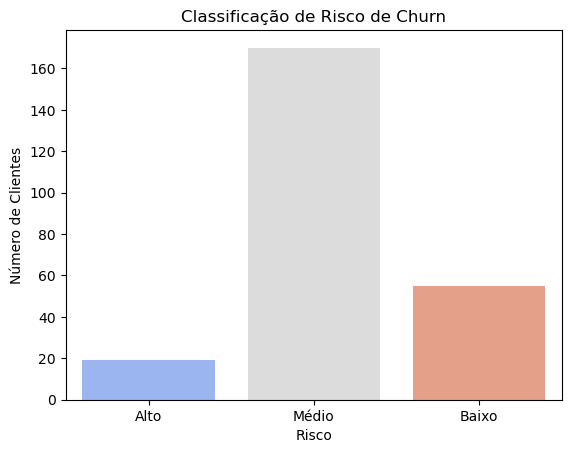

In [74]:
# Criação da classificação de risco baseada em regras simples
def classificar_risco(row):
    if row['Histórico_de_Pagamento'] == 'Inadimplente Frequente':
        return 'Alto'
    elif row['NPS (Satisfação do Cliente)'] < 6 or row['Tempo_de_Resposta_Atendimento (min)'] > 40:
        return 'Médio'
    else:
        return 'Baixo'

data['Risco_Churn'] = data.apply(classificar_risco, axis=1)

# Visualiza a distribuição
sns.countplot(data=data, x='Risco_Churn', palette='coolwarm')
plt.title("Classificação de Risco de Churn")
plt.xlabel("Risco")
plt.ylabel("Número de Clientes")
plt.show()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_26028\2310624491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Mês_do_Churn_Num', palette='Blues')


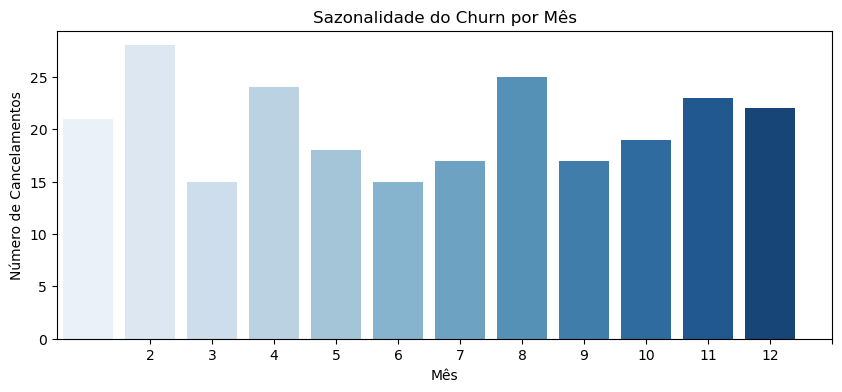

In [75]:
# Gráfico de churn por mês numérico
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Mês_do_Churn_Num', palette='Blues')
plt.title("Sazonalidade do Churn por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Cancelamentos")
plt.xticks(range(1, 13))
plt.show()


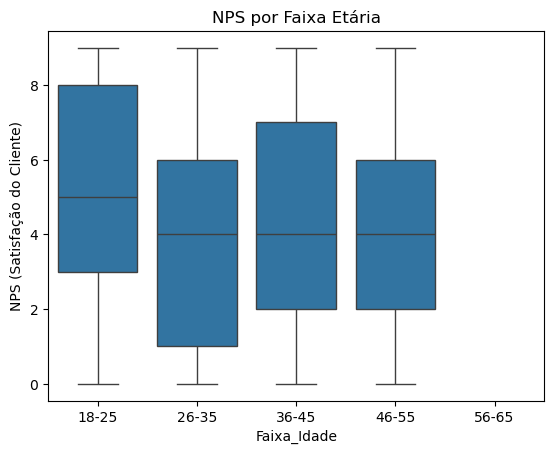

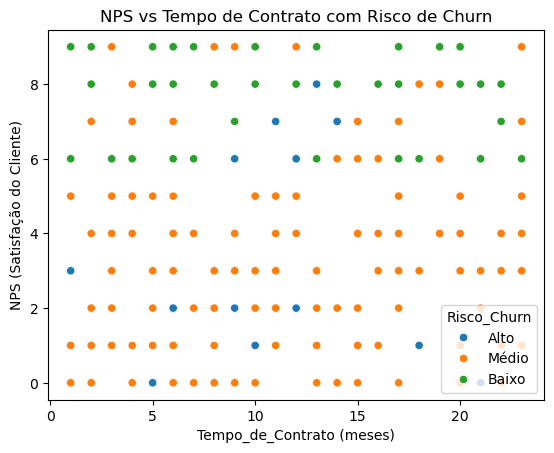

In [76]:
# NPS médio por região
data.groupby('Região')['NPS (Satisfação do Cliente)'].mean().sort_values()

# Risco por faixa etária
data['Faixa_Idade'] = pd.cut(data['Idade'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.boxplot(data=data, x='Faixa_Idade', y='NPS (Satisfação do Cliente)')
plt.title("NPS por Faixa Etária")
plt.show()

# Risco por tempo de contrato
sns.scatterplot(data=data, x='Tempo_de_Contrato (meses)', y='NPS (Satisfação do Cliente)', hue='Risco_Churn')
plt.title("NPS vs Tempo de Contrato com Risco de Churn")
plt.show()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_26028\2859422018.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn_Financeiro', y='NPS (Satisfação do Cliente)', palette='Set2')


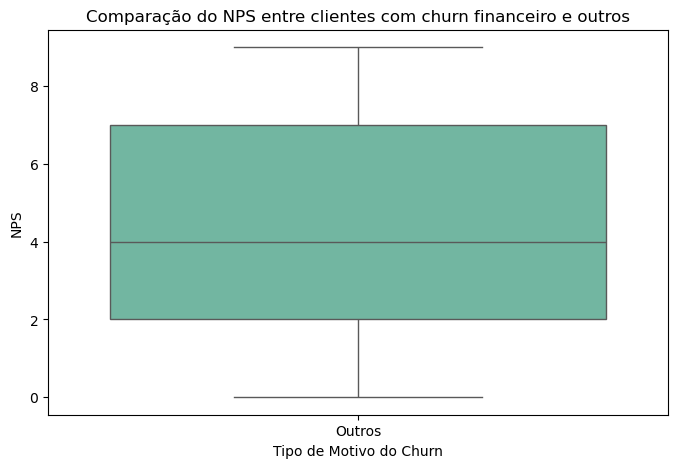

In [ ]:
# Define se foi por motivo financeiro
data['Churn_Financeiro'] = data['Motivo_do_Churn'].apply(
    lambda x: 'Financeiro' if 'financeiro' in x.lower() else 'Outros'
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Churn_Financeiro', y='NPS (Satisfação do Cliente)', palette='Set2')
plt.title("Comparação do NPS entre clientes com churn financeiro e outros")
plt.xlabel("Tipo de Motivo do Churn")
plt.ylabel("NPS")
plt.show()
